<a href="https://colab.research.google.com/github/andreiacampos98/datascience_course/blob/main/Modulo_7_%E2%80%93_Sess%C3%A3o_1_Exercicio_2_Equipa_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
from scipy.stats import skew


df=pd.read_csv('/content/laptop_pricing.csv')

df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


# Medidas de localização

In [11]:
print(f"A média dos preços é: {df['Price'].mean():.2f}")
print(f"A mediana dos preços é: {df['Price'].median():.2f}")
print(f"A moda dos preços é: {df['Price'].mode().tolist()}")

A média dos preços é: 1462.34
A mediana dos preços é: 1333.00
A moda dos preços é: [888, 1117, 1142, 1396]


In [22]:
print(f"A média do tamanho do ecrã é: {df['Screen_Size_cm'].mean():.2f}")
print(f"A mediana do tamanho do ecrã é: {df['Screen_Size_cm'].median():.2f}")
print(f"A moda do tamanho do ecrã é: {df['Screen_Size_cm'].mode().tolist()}")

A média do tamanho do ecrã é: 37.27
A mediana do tamanho do ecrã é: 38.10
A moda do tamanho do ecrã é: [39.624]


In [30]:
print(f"A moda do tamanho do ecrã é: {df['Manufacturer'].mode().tolist()}")

A moda do tamanho do ecrã é: ['Dell']


# Medidas de localização relativa

In [13]:
print(f"O valor minimo dos preços é: {df['Price'].min()}")
print(f"O valor máximo dos preços é: {df['Price'].max()}")
print(f"O 1º quartil é : {df['Price'].quantile(0.25)}")
print(f"O 2º quartil é : {df['Price'].quantile(0.50)}")
print(f"O 3º quartil é : {df['Price'].quantile(0.75)}")

O valor minimo dos preços é: 527
O valor máximo dos preços é: 3810
O 1º quartil é : 1066.5
O 2º quartil é : 1333.0
O 3º quartil é : 1777.0


In [23]:
print(f"O valor minimo do tamanho do ecrã é: {df['Screen_Size_cm'].min()}")
print(f"O valor máximo do tamanho do ecrã é: {df['Screen_Size_cm'].max()}")
print(f"O 1º quartil é : {df['Screen_Size_cm'].quantile(0.25)}")
print(f"O 2º quartil é : {df['Screen_Size_cm'].quantile(0.50)}")
print(f"O 3º quartil é : {df['Screen_Size_cm'].quantile(0.75)}")

O valor minimo do tamanho do ecrã é: 30.48
O valor máximo do tamanho do ecrã é: 43.942
O 1º quartil é : 35.56
O 2º quartil é : 38.1
O 3º quartil é : 39.624


# Medidas de dispersão

In [18]:
print(f"O desvio padrão dos preços é {df['Price'].std():.2f}")
print(f"A variância dos preços é {df['Price'].var():.2f}")
iqr = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)
print(f"A amplitude IQR é {iqr:.2f}")

O desvio padrão dos preços é 574.61
A variância dos preços é 330174.01
A amplitude IQR é 710.50


In [24]:
print(f"O desvio padrão do tamanho do ecrã é {df['Screen_Size_cm'].std():.2f}")
print(f"A variância do tamanho do ecrã é {df['Screen_Size_cm'].var():.2f}")
iqr_screen = df['Screen_Size_cm'].quantile(0.75) - df['Screen_Size_cm'].quantile(0.25)
print(f"A amplitude IQR é {iqr_screen:.2f}")

O desvio padrão do tamanho do ecrã é 2.97
A variância do tamanho do ecrã é 8.83
A amplitude IQR é 4.06


# Medidas de forma



In [20]:
skewness = skew(df['Price'])
print(f"O coeficiente de assimetria é: {skewness:.2f}")

O coeficiente de assimetria é: 1.27


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

#Relação com variavel price

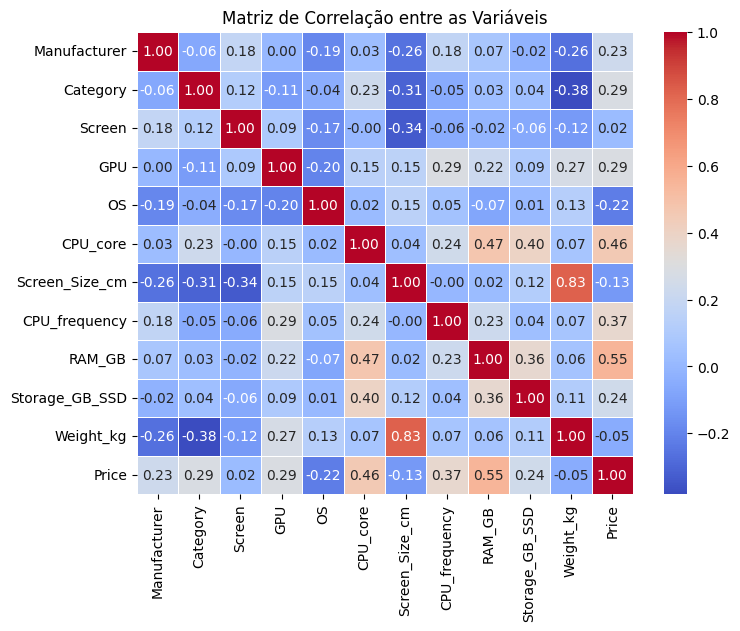

In [50]:
df['Manufacturer'] = df['Manufacturer'].astype('category').cat.codes
df['Screen'] = df['Screen'].astype('category').cat.codes
corr_matrix = df.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação entre as Variáveis")
plt.show()

A variavel CPU_Core e RAM_GB são as que mais influenciam o preço dos laptops.

# Relação entre a variável price e Manufacturer

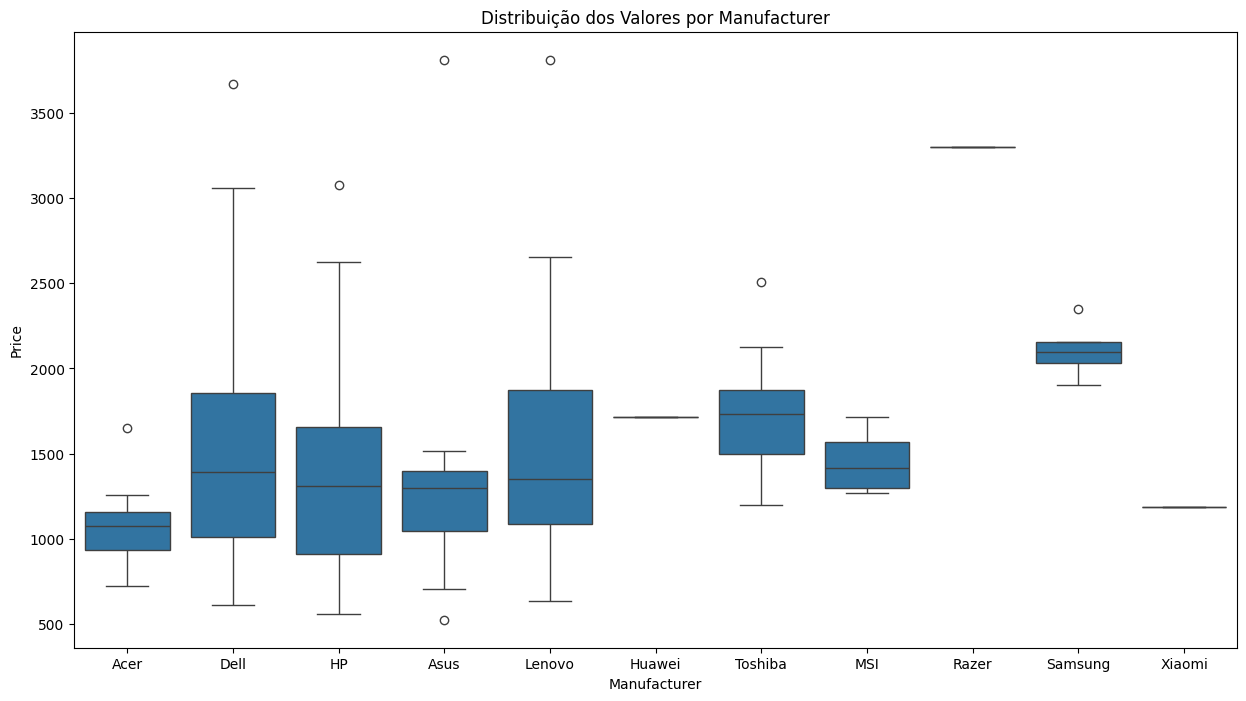

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Manufacturer'], y=df['Price'])
plt.title("Distribuição dos Valores por Manufacturer")
plt.show()

# Relação entre a variável price e Screen_Size_cm

In [34]:
corr=df['Price'].corr(df['Screen_Size_cm'])
print(f"A correlação entre Price e Screen_Size_cm é: {corr:.2f}")

A correlação entre Price e Screen_Size_cm é: -0.13


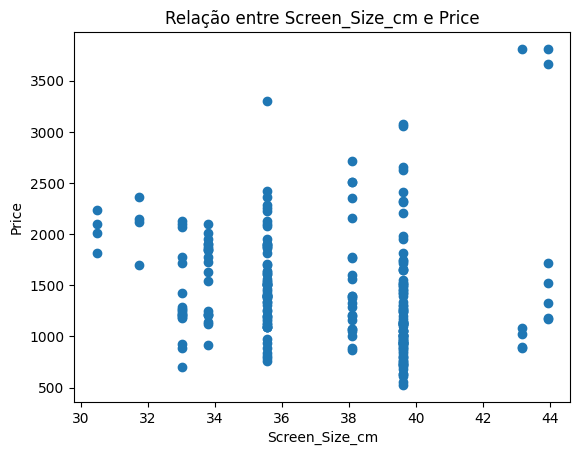

In [33]:
plt.scatter(df['Screen_Size_cm'], df['Price'])
plt.xlabel('Screen_Size_cm')
plt.ylabel('Price')
plt.title('Relação entre Screen_Size_cm e Price')
plt.show()

# Representação gráfica da distribuição

<Axes: xlabel='Price', ylabel='Count'>

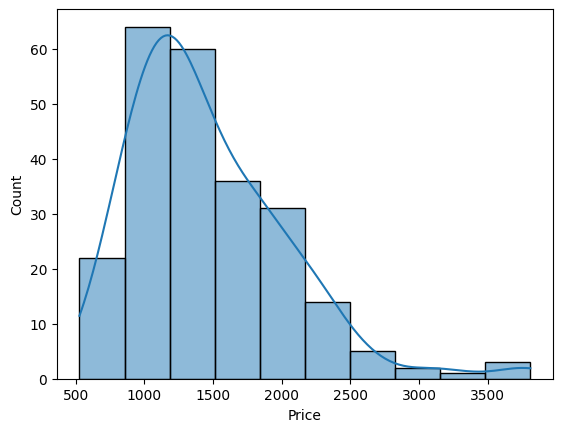

In [44]:
sns.histplot(df['Price'], bins=10, kde=True)


<Axes: xlabel='Screen_Size_cm', ylabel='Count'>

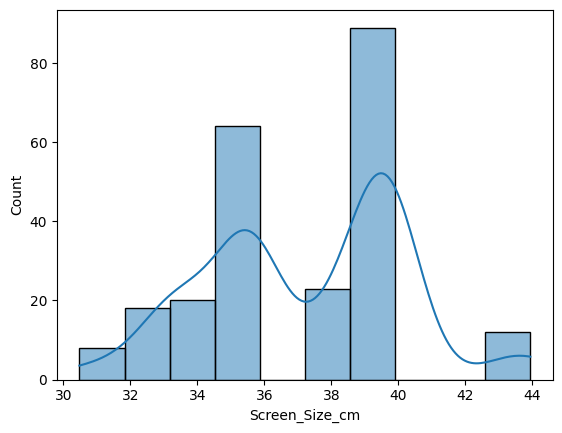

In [45]:
sns.histplot(df['Screen_Size_cm'], bins=10, kde=True)

<Axes: xlabel='Screen_Size_cm', ylabel='Price'>

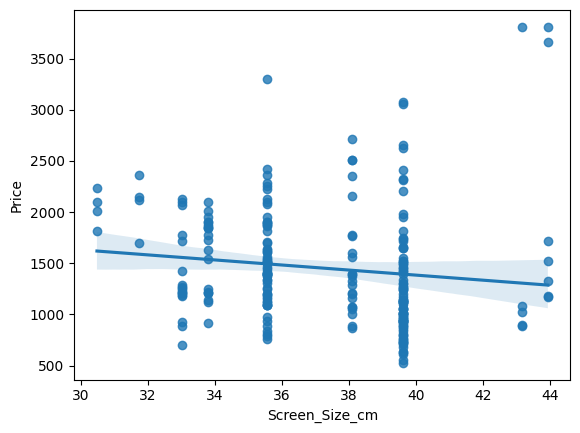

In [46]:
sns.regplot(x=df['Screen_Size_cm'], y=df['Price'])

A distribuição de preços de computadores apresenta uma assimetria positiva (à direita), indicando que há uma maior quantidade de computadores com valores mais baixos.

A distribuição do Screen_Size_cm não apresenta uma distribuição normal.

A correlação entre o tamanho do ecrã (Screen_Size_cm) e o preço (Price) é baixa (-0.13), o que sugere que não existe uma relação linear forte entre essas duas variáveis.